# House price prediction

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

### Mengidentifikasi Informasi Dataset

In [2]:
# Menampilkan informasi dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# Menampilkan statistik deskriptif dari dataset
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Mengatasi Misiing Values

In [5]:
# pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

Berdasarkan hasil dari langkah sebelumnya, kita akan memutuskan bagaimana menangani nilai yang hilang dengan dua cara.

>Mengisi Nilai yang Hilang: data di atas terdapat beberapa fitur yang memiliki missing value kurang dari 75% dari jumlah skala pada data. Namun, perlu Anda catat bahwa seluruh fitur tersebut memiliki tipe data yang berbeda. Sehingga penanganan missing value-nya pun perlu dibedakan.

Mari kita mulai dengan mengatasi missing value untuk tipe data numerik.

In [6]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.

- Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.

- Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom.

Secara keseluruhan, kode ini bertujuan untuk membersihkan data dengan memastikan bahwa semua kolom numerik dalam subset tertentu (train[less]) tidak memiliki missing value (NaN) dengan menggantinya menggunakan nilai median kolom masing-masing.

Selanjutnya, kita perlu menangani permasalahan yang serupa pada data yang bertipe object atau string. Sedikit berbeda dengan kasus data numerik, pada kasus ini kita tidak bisa menggunakan median, mean, atau fungsi agregasi lainnya. Biasanya ada dua cara yang sering dilakukan untuk mengatasi permasalahan missing value pada data kategori.

- Mengisi Missing Value dengan Modus (Nilai yang Paling Sering Muncul): pendekatan ini cukup umum karena nilai modus sering kali merupakan representasi yang baik untuk data yang hilang dalam konteks kategorikal.
- Mengisi dengan Kategori Baru (Misalnya "Unknown" atau "Missing"): ini adalah cara lain untuk menangani missing value dengan menandai data yang hilang sebagai kategori baru.

Pada contoh kasus ini, mari kita atasi dengan mengisi missing value dengan modus atau nilai yang paling sering muncul pada masing-masing fitur.

In [7]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

- Menghapus Kolom dengan Banyak Nilai yang Hilang:jika ada kolom dengan terlalu banyak nilai yang hilang, kita bisa mempertimbangkan untuk menghapusnya (pada kasus ini kita mengambil batasan 75%). Untuk mengatasi kasus ini sangatlah mudah, pertama Anda perlu mengambil index atau nama kolom dari fitur yang memiliki missing value lebih dari batasan yang sudah ditentukan (Anda dapat lihat kode ketika memisahkan kolom di atas). Kemudian hal yang perlu dilakukan adalah menghapus kolom tersebut sesuai dengan nama fitur yang sudah ditentukan sebelumnya

In [8]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

In [9]:
# pemeriksaan terhadap data yang sudah melewati tahapan verifikasi missing value dengan kode berikut.
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

# Mengatasi Outliers
Seperti yang Anda ketahui bahwa outliers merupakan salah satu blocker dalam membangun model machine learning yang optimal. Hal ini bisa disebabkan oleh berbagai hal seperti kesalahan pengisian data, error yang terjadi ketika pengumpulan data, dan lain sebagainya. 

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

Mari kita periksa terlebih dahulu apakah dataset yang digunakan memiliki outlier atau tidak menggunakan kode berikut.

In [ ]:
# Mari kita periksa terlebih dahulu apakah dataset yang digunakan memiliki outlier atau tidak menggunakan kode berikut.
import seaborn as sns
import matplotlib.pyplot as plt
 
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()
    plt.show()

Perhatikan visualisasi data di atas, apakah Anda dapat menyimpulkan sesuatu? Yup, nilai yang berada di bawah batas bawah atau di atas batas atas dianggap sebagai outlier. Ada dua pilihan yang biasa dilakukan untuk mengatasi permasalahan ini.

1. Anda dapat memilih untuk menghapus outlier.

2. Menggantinya dengan nilai yang lebih moderat (seperti batas terdekat), atau menerapkan transformasi.

Nah, pada kasus ini, kita akan memilih untuk menghapus data outlier dengan asumsi bahwa outlier yang terjadi merupakan human error dan tidak ada pengaruh yang besar pada analisis deskriptif. Mari kita mulai pemeriksaan outlier menggunakan metode IQR.

Berikut adalah langkah-langkah umum untuk mendeteksi dan menangani outlier menggunakan metode IQR.

1. Menghitung IQR, Q1, dan Q3

    - Q1 (Quartile 1): Nilai di persentil ke-25 data.
    - Q3 (Quartile 3): Nilai di persentil ke-75 data.
    - IQR: Rentang antara Q3 dan Q1 (IQR = Q3 - Q1).

2. Menentukan Batas Bawah dan Batas Atas

    - Batas Bawah: Q1 - 1.5 * IQR

    - Batas Atas: Q3 + 1.5 * IQR

In [11]:
# Contoh sederhana untuk mengindentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
 
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

# Normalisasi dan Standardisasi Data

## Normalisasi
Normalisasi (juga dikenal sebagai penskalaan min-max) bertugas untuk mengubah fitur sehingga nilainya berada dalam rentang tertentu, biasanya antara 0 dan 1.

Berikut poin-poin yang menjadi pertimbangan ketika akan melakukan normalisasi.

- **Fitur dengan Skala Berbeda**: ketika fitur memiliki skala yang sangat berbeda dan Anda ingin menyamakan rentangnya.

- **Model Berbasis Jarak**: jika Anda menggunakan algoritma yang bergantung pada jarak, seperti K-Nearest Neighbors (KNN) atau K-Means clustering, normalisasi dapat membantu karena model ini sensitif terhadap skala fitur.

- **Data Tidak Terdistribusi Normal**: jika data tidak terdistribusi normal dan Anda ingin mengubah data menjadi rentang yang lebih seragam.

## Standardisasi
Standardisasi (juga dikenal sebagai penskalaan Z-score) bertugas untuk mengubah skala pada suatu fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

Berikut poin-poin yang menjadi pertimbangan ketika akan melakukan standardisasi.

- **Data Berdistribusi Normal**: ketika data mengikuti distribusi normal (atau mendekati normal) dan Anda ingin mempertahankan informasi tentang distribusi data.
- **Model Berbasis Regresi**: untuk algoritma yang memerlukan asumsi distribusi normal atau model linier seperti Regresi Linier, Standar, atau Logistic Regression.
- **Data dengan Skala Berbeda**: ketika fitur memiliki skala yang berbeda tetapi Anda ingin memastikan bahwa setiap fitur berkontribusi secara proporsional tanpa mengubah distribusi data secara signifikan.

In [ ]:
    from sklearn.preprocessing import StandardScaler
 
# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

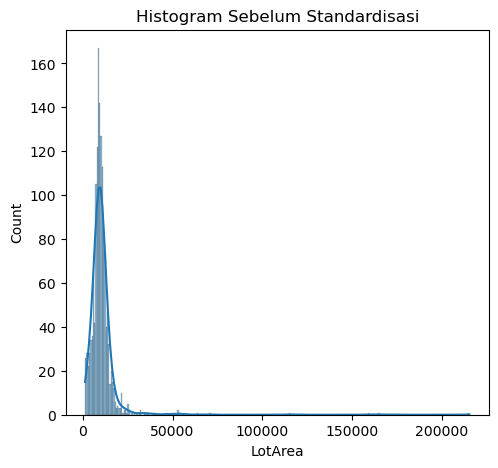

In [14]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

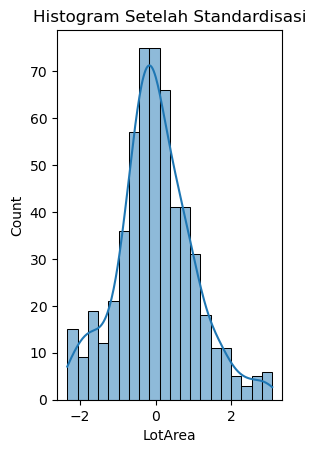

In [15]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

# Menangani Duplikasi Data

In [16]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris Duplikasi:")
print(df[duplicates])

Baris Duplikasi:
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


# Mengonversi Tipe Data


In [17]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


## One Hot Encoding
One-Hot Encoding: mengubah setiap kategori menjadi kolom biner terpisah dengan nilai 0 atau 1 (bisa juga True atau False).

In [18]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


## Label Encoding
Label Encoding: memberikan label numerik untuk setiap kategori, meskipun ini hanya cocok untuk data kategorikal ordinal.

In [19]:
from sklearn.preprocessing import LabelEncoder
 
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)
 
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
 
# Menampilkan hasil
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


# Exploratory dan Explanatory Data Analysis

In [20]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [21]:
#  Menghitung jumlah dan presentase missing values di setiap kolom
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'percentage': missing_percentage 
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,percentage


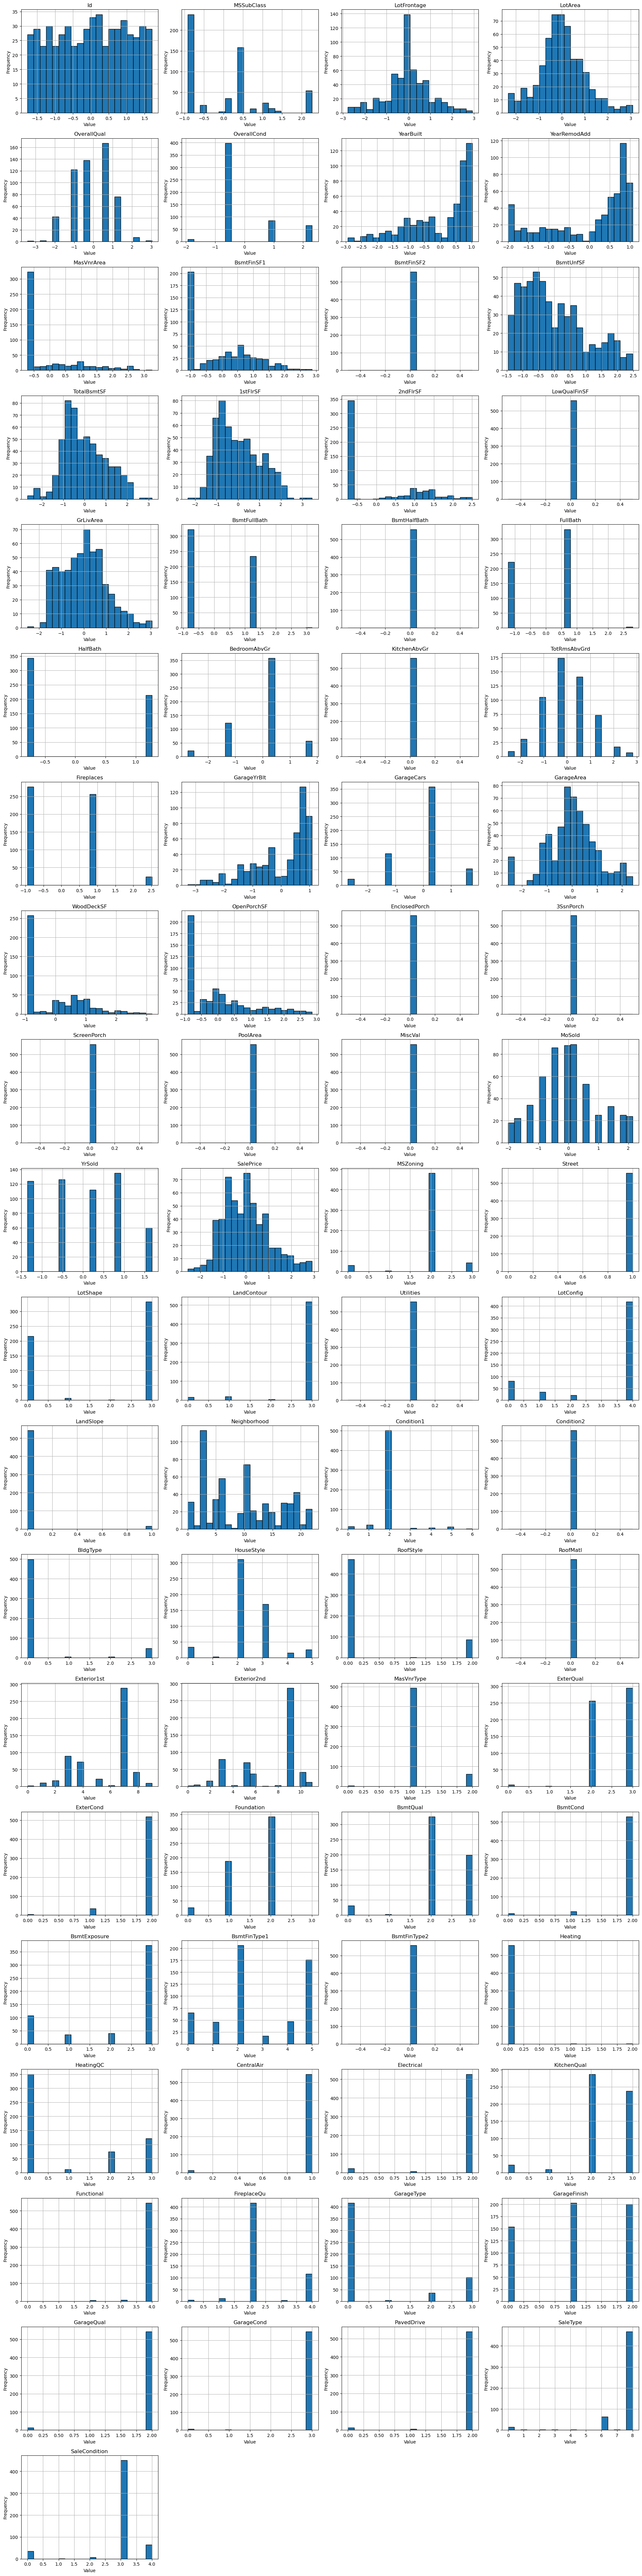

In [22]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Selanjutnya, mari kita visualisasikan distribusi beberapa kolom serta melihat korelasi antara variabel numerik. 

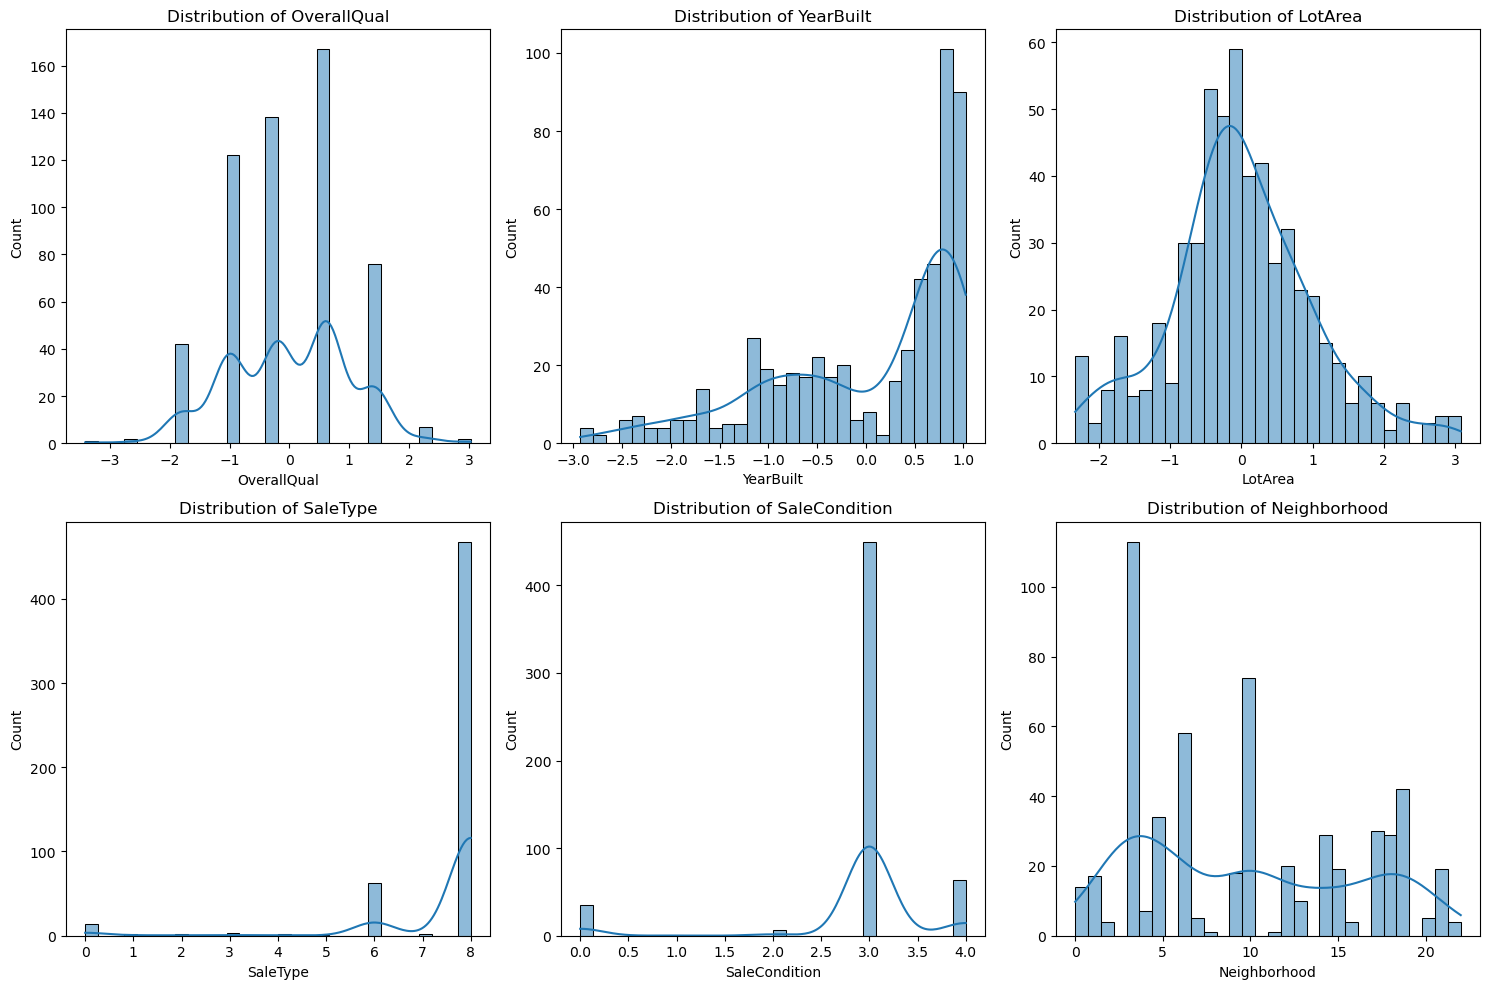

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data untuk beberapa kolum
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition', 'Neighborhood']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()    

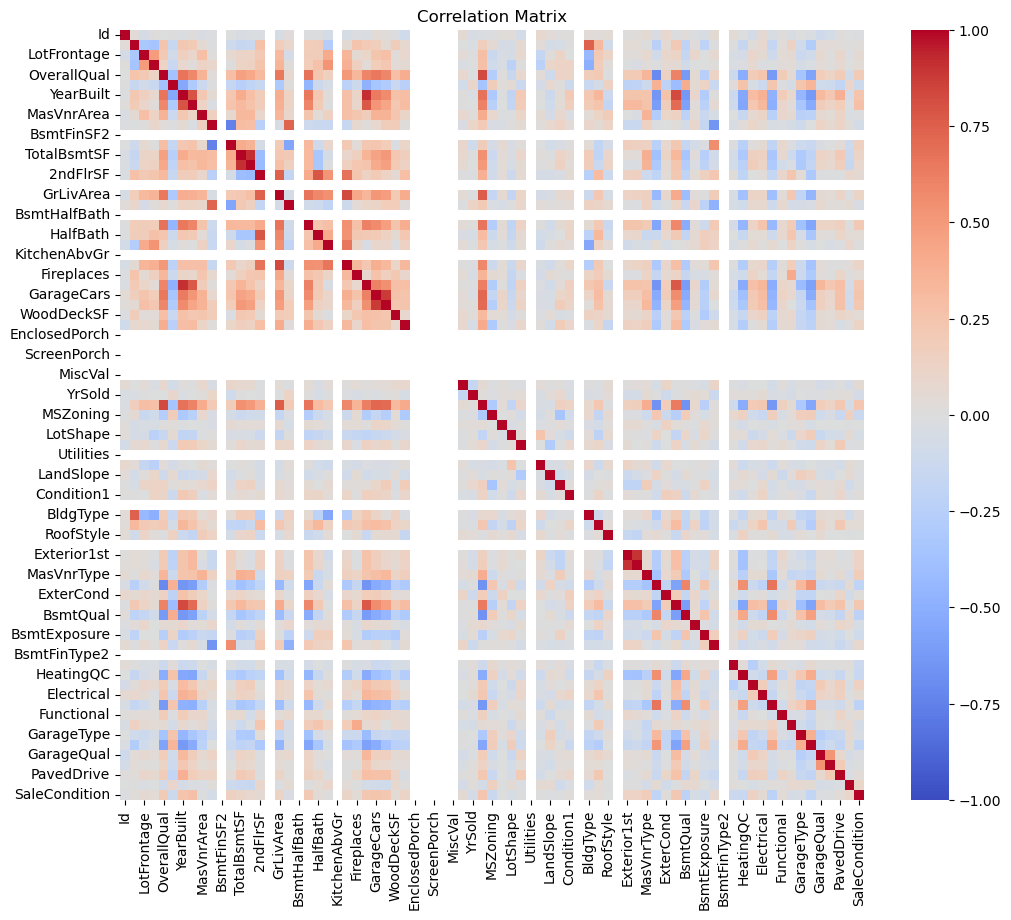

In [24]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

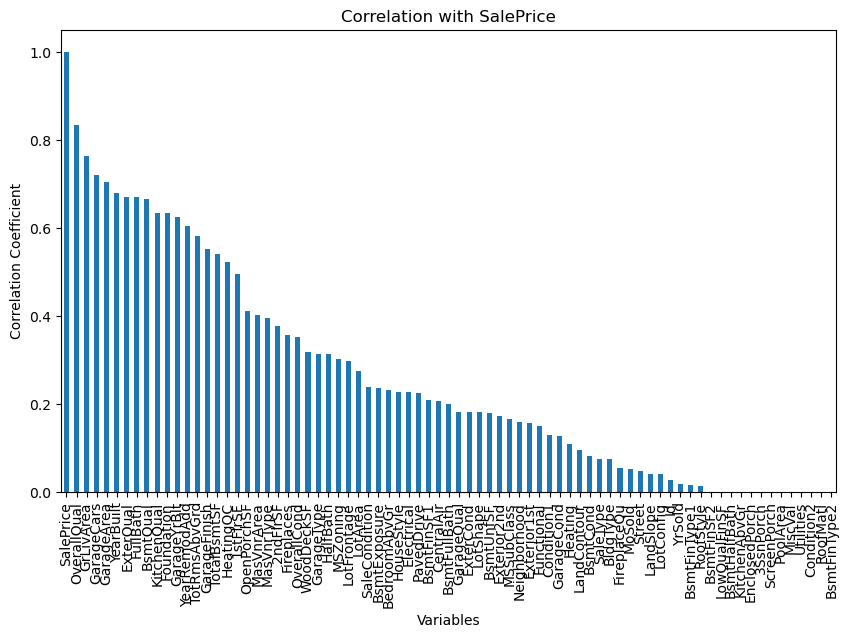

In [25]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

In [26]:
import sklearn

In [27]:
# Memisahkan fitur (x) dan target (y)
x = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

Untuk membagi dataset menjadi train set dan test set, kita bisa menggunakan fungsi train_test_split. Fungsi ini memerlukan beberapa parameter utama:

- X: kumpulan atribut atau fitur dari dataset, yaitu semua kolom kecuali kolom target (pada kasus ini SalePrice).
- y: target atau label yang akan kita prediksi merupakan kolom yang ingin kita pisahkan (pada kasus ini SalePrice).
- test_size: persentase dari data yang akan digunakan sebagai test set. Misalnya, ketika Anda menentukan test_size=0.2, 20% dari data akan menjadi test set, dan 80% sisanya akan menjadi train set.
- random_state: parameter yang memastikan pemisahan data yang konsisten setiap kali fungsi tersebut dijalankan. Parameter ini mengontrol pengacakan saat membagi dataset sehingga dengan menetapkan random_state hasil pembagian data (train set dan test set) akan selalu sama. Hal ini penting untuk memastikan eksperimen yang dapat direproduksi dan evaluasi model yang konsisten. Namun, parameter ini juga dapat memiliki kekurangan yaitu model tidak akan menerima inputan baru yang mungkin akan lebih baik dari sebelumnya.

Ketika Anda menjalankan train_test_split, fungsi ini akan mengembalikan empat bagian data seperti berikut.

1. X_train: fitur untuk train set.
2. X_test: fitur untuk test set.
3. y_train: target untuk train set.
4. y_test: target untuk test set.

Ini berarti setelah pemanggilan fungsi, Anda memiliki dua bagian data: satu untuk melatih model (train set) dan satu lagi untuk menguji model (test set).

In [28]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [29]:
# Menghtung panjang/jumlah data
print("Jumlah data: ",len(x))
# menghitung panjang/jumlah data pada x_train
print("jumllah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("jumlah data uji: ",len(x_test))

Jumlah data:  557
jumllah data latih:  445
jumlah data uji:  112


# Modelling

## Melatih Model (Training)

In [30]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
# melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

## Evaluasi

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# eb=valuasi model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# konversi dictionary ke DataFrame
df_result = pd.DataFrame(data, index=['Lars'])
df_result

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517


In [32]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# menambahkan hasil evaluasi LR ke DataFrame
df_result.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_result

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237334,0.095762,0.880709


In [33]:
# Evaluasi pada model Linear Regression
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_result.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_result

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237334,0.095762,0.880709
GradientBoostingRegressor,0.217360,0.089055,0.889065


Mari kita pelajari apa fungsi dari masing-masing function tersebut.

- **.predict()**: fungsi .predict() pada scikit-learn digunakan untuk membuat prediksi berdasarkan model yang telah dilatih. Setelah Anda melatih model dengan data pelatihan (menggunakan .fit() pada materi sebelumnya), Anda dapat menggunakan .predict() untuk menghasilkan nilai prediksi pada data baru atau data testing.

- **mean_absolute_error**: MAE mengukur rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual. Ini adalah ukuran yang intuitif karena langsung menghitung seberapa jauh prediksi dari nilai sebenarnya tanpa memperhitungkan arah (positif atau negatif).

- **mean_squared_error**: MSE mengukur rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai aktual. Karena kesalahan dikuadratkan, MSE memberikan penalti (nilai error) yang lebih besar untuk kesalahan yang lebih besar, membuatnya lebih sensitif terhadap outlier.

- **r2_score**: R² adalah metrik statistik yang menunjukkan seberapa baik nilai prediksi mendekati nilai aktual. R² mengukur proporsi varians dari target yang dapat dijelaskan oleh fitur dalam model.

## Menyimpan Model

In [34]:
import joblib
# menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

In [35]:
import pickle

# menyimpan model ke dalam file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

# Deployment dan Monitoring

In [36]:
# membuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')

# memuat model dari file pickle
with open('gbr_model.pkl','rb') as file:
    pickle_model = pickle.load(file)

In [37]:
from flask import Flask, request, jsonify
import joblib
 
# Inisialisasi aplikasi Flask
app = Flask(__name__)
 
# Memuat model yang telah disimpan
joblib_model = joblib.load('gbr_model.joblib') # Pastikan path file sesuai dengan penyimpanan Anda
 
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']  # Mengambil data dari request JSON
    prediction = joblib_model.predict(data)  # Melakukan prediksi (harus dalam bentuk 2D array)
    return jsonify({'prediction': prediction.tolist()})
 
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
c:\Users\Asus\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [07/Oct/2025 10:43:33] "POST /predict HTTP/1.1" 200 -


Metrik yang Dimonitor:

- Accuracy, Precision, Recall, F1-Score: digunakan untuk memantau kinerja model klasifikasi.
- Mean Squared Error (MSE), R-squared: digunakan untuk model regresi.
- Data Drift Metrics: memantau perubahan distribusi data input dibandingkan dengan data yang digunakan saat pelatihan.
- Model Latency: mengukur waktu yang diperlukan model untuk memberikan prediksi. Hal ini penting untuk aplikasi real-time.

Alat Monitoring:

- Prometheus/Grafana: digunakan untuk memantau metrik dan membuat dashboard custom.
- ELK Stack (Elasticsearch, Logstash, Kibana): digunakan untuk monitoring log dan menganalisis anomali.
- Sentry: digunakan untuk mendeteksi dan melaporkan error di aplikasi yang mengintegrasikan model.
- MLflow: alat khusus untuk tracking eksperimen dan monitoring model machine learning.